Dataset- https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bhushantaksande
Your Kaggle Key: ··········


100%|██████████| 86.8M/86.8M [00:00<00:00, 108MB/s]


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten, Dense,Dropout, Softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.preprocessing import image
from glob import glob
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
os.listdir('/content/brain-tumor-classification-mri/Training')

['glioma_tumor', 'pituitary_tumor', 'meningioma_tumor', 'no_tumor']

In [ ]:
Image_size=[224,224]
train_path="/content/brain-tumor-classification-mri/Testing/"
test_path="/content/brain-tumor-classification-mri/Training/"

In [ ]:
resnet= ResNet50(include_top= False, input_shape= Image_size+[3], weights='imagenet')

In [ ]:
for layer in resnet.layers:
    layer.trainable= False

In [ ]:
folders= glob("/content/brain-tumor-classification-mri/Testing/*")

In [ ]:
folders

['/content/brain-tumor-classification-mri/Testing/glioma_tumor',
 '/content/brain-tumor-classification-mri/Testing/pituitary_tumor',
 '/content/brain-tumor-classification-mri/Testing/meningioma_tumor',
 '/content/brain-tumor-classification-mri/Testing/no_tumor']

In [ ]:
train_folders=glob("/content/brain-tumor-classification-mri/Training/*")

In [ ]:
train_folders

['/content/brain-tumor-classification-mri/Training/glioma_tumor',
 '/content/brain-tumor-classification-mri/Training/pituitary_tumor',
 '/content/brain-tumor-classification-mri/Training/meningioma_tumor',
 '/content/brain-tumor-classification-mri/Training/no_tumor']

In [ ]:
x= Flatten()(resnet.output)
prediction= Dense(len(folders), activation='Softmax')(x)
model = Model(inputs = resnet.input , outputs = prediction)
plot_model(model)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'] )

In [ ]:
train_datagen= ImageDataGenerator(rescale= 1./255,
                                 shear_range= 0.2,
                                 zoom_range= 0.2,
                                 horizontal_flip= True,
                                 vertical_flip= True,
                                width_shift_range=0.2,
                                 height_shift_range=0.2)
test_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
training_set= train_datagen.flow_from_directory("/content/brain-tumor-classification-mri/Training/", target_size=[224,224], batch_size=32, class_mode='categorical')
test_set= train_datagen.flow_from_directory("/content/brain-tumor-classification-mri/Testing/", target_size=[224,224], batch_size=32, class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
model.fit(training_set,
            validation_data=test_set,
            epochs=10,
            steps_per_epoch=len(training_set),
             validation_steps=len(test_set))

Epoch 1/10
90/90 [==============================] - 55s 576ms/step - loss: 2.5099 - accuracy: 0.3725 - val_loss: 2.9547 - val_accuracy: 0.3325
Epoch 2/10
90/90 [==============================] - 49s 544ms/step - loss: 1.6245 - accuracy: 0.4289 - val_loss: 4.5422 - val_accuracy: 0.2868
Epoch 3/10
90/90 [==============================] - 46s 511ms/step - loss: 1.7870 - accuracy: 0.4341 - val_loss: 5.7705 - val_accuracy: 0.2843
Epoch 4/10
90/90 [==============================] - 46s 507ms/step - loss: 1.6406 - accuracy: 0.4519 - val_loss: 3.5188 - val_accuracy: 0.3198
Epoch 5/10
90/90 [==============================] - 44s 493ms/step - loss: 1.2888 - accuracy: 0.4875 - val_loss: 3.2736 - val_accuracy: 0.3579
Epoch 6/10
90/90 [==============================] - 46s 512ms/step - loss: 1.3982 - accuracy: 0.4683 - val_loss: 4.0341 - val_accuracy: 0.3477
Epoch 7/10
90/90 [==============================] - 45s 498ms/step - loss: 1.3006 - accuracy: 0.5038 - val_loss: 3.6746 - val_accuracy: 0.3477

In [ ]:
model.save('/content/drive/MyDrive/Bone_tumor/model/')

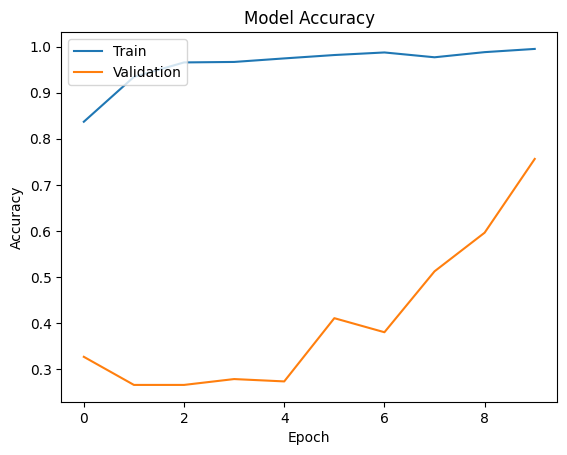

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

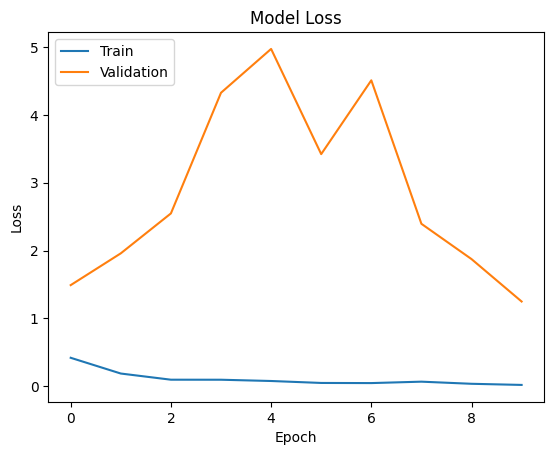

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_datagen)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

13/13 [==============================] - 1s 101ms/step - loss: 1.2486 - accuracy: 0.7563
Test Accuracy: 75.63%


In [ ]:
# model1.save('/content/drive/MyDrive/brain_tumor_detector.h5')